In [95]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import scipy.optimize as opt
import statistics as st

# font = {'family' : 'normal',
# 'weight' : 'normal',
# 'size' : 18}
# matplotlib.rc('font', **font)

# Лабораторная работа №1
##### Ребрий Лидия Б02-307

#### Поиск

Общая функция исследования времени поиска:

<font size=1>

```cpp
void experiment_of_function(int long long N, std::string name, bool arr_sort, bool worst){

    int long long *arr = new int long long[N];

    unsigned long long seed = time(0);
    std:: default_random_engine rng(seed);
    std:: uniform_int_distribution <int long long> dstr(-1e10, 1e10); // пределы целых чисел в массиве - (-1e10, 1e10)
    for (unsigned counter = N; counter != 0; --counter)
        arr[counter] = dstr(rng);
    if (arr_sort){
        sort(arr, N);
    }

    std:: default_random_engine rng0(2*seed);
    std:: uniform_int_distribution <unsigned long long> dstr0(0, N-1);
    for (unsigned counter = 100; counter != 0; --counter){ // делаем по 100 измерений времени
        auto begin = std:: chrono :: steady_clock :: now();
        for (unsigned cnt = 1000; cnt != 0; --cnt)
        // ========= функция ===================================
            liner_finer(arr, N, arr[dstr0(rng0)]+ worst*3*1e10);
        // =======================================================
        auto end = std:: chrono :: steady_clock :: now();
        auto time_span = std:: chrono :: duration_cast<std:: chrono :: milliseconds >(end - begin);
        auto time = time_span.count();
            
        std::ofstream out;
        out.open(name, std::ios::app);
        out << N << ";" << time << std:: endl;
        out.close(); 
}
```

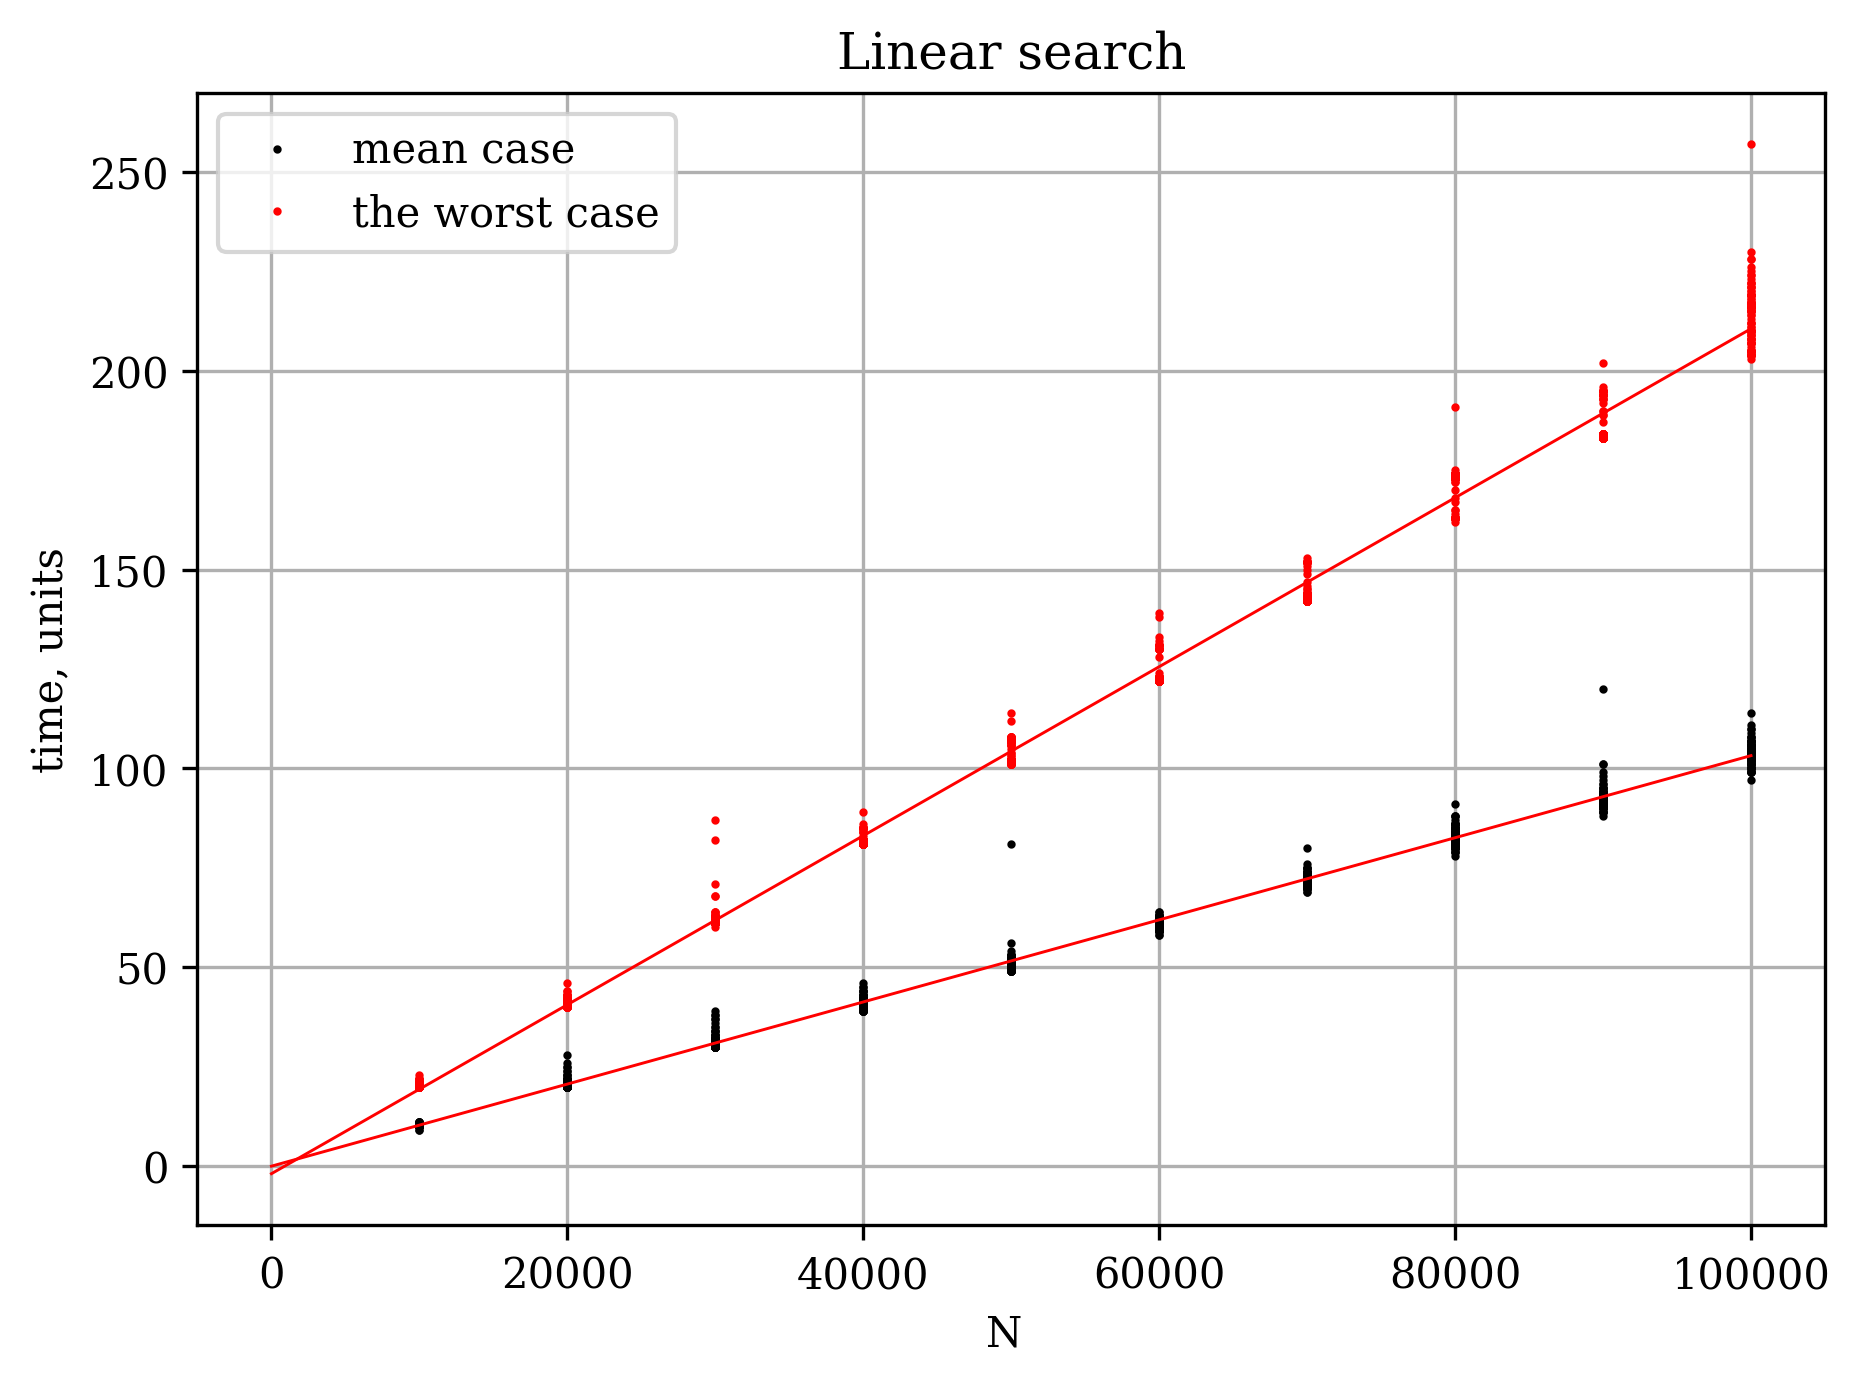

In [96]:
data = pd.read_csv("./line.txt", sep=";")
data_worst = pd.read_csv("./line_worst.txt", sep=";")

def line(x, a, b):
    return a + b*x

y_arr = data['time']
x_arr = data['N']
yw_arr = data_worst['time']
xw_arr = data_worst['N']

# y0_arr = data.groupby(['N']).agg({'time': ['mean', 'std']})['time']['mean']
# x0_arr = data.groupby(['N']).agg({'N': 'mean'})['N']
# y0_err = data.groupby(['N']).agg({'time': ['mean', 'std']})['time']['std']

right = 0
left = 1e5

popt, pcov = opt.curve_fit(line, x_arr, y_arr)
poptw, pcovw = opt.curve_fit(line, xw_arr, yw_arr)

plt.figure(figsize=[7,5], dpi=300)
plt.plot(x_arr, y_arr, ls='', marker='.', color='black', markersize=2, label = 'mean case')
plt.plot(np.linspace(right, left, 100), line(np.linspace(right, left, 100), popt[0], popt[1]), lw=0.7, color='red')
plt.plot(xw_arr, yw_arr, ls='', marker='.', color='red', markersize=2, label = 'the worst case')
plt.plot(np.linspace(right, left, 100), line(np.linspace(right, left, 100), poptw[0], poptw[1]), lw=0.7, color='red')
plt.ylabel('time, units')
plt.xlabel('N ')
plt.legend()
plt.grid(True)
plt.title('Linear search')
plt.show()
